# Homework 2

Grae Cabatingan

## Question 1: Complete as much of the [networkx tutorial](https://networkx.org/documentation/stable/tutorial.html) as you find useful.

Hey, I've used this stuff before, yippee!

In [1]:
import networkx as nx

G = nx.Graph()

We can add stuff to the graph in a few different ways:

In [2]:
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

We can do even more fun things!

In [3]:
# Add nodes from another graph
H = nx.path_graph(10)
G.add_nodes_from(H)

In [4]:
# Use an entire graph as a node!
G.add_node(H)

In [5]:
# We can do stuff with edges too
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges)
G.clear()

# And we can double up stuff without a problem
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

There's a lot more stuff, but for now I'm going to leave the tutorial alone to see what the other questions look like... If I need to come back to it, I will.

## Question 2

> Explore some of the built in networkx graph utilities from the following list:
> 1. complete
> 2. barbell
> 3. cycle
> 4. circulant
> 5. grid
> 6. ladder
>
> Try building graphs with varying numbers of vertices and graph parameters. Upload a screenshot of the graph you find most interesting. (Use something other than the apple heic image format since Learning Suite can't display that image type.)


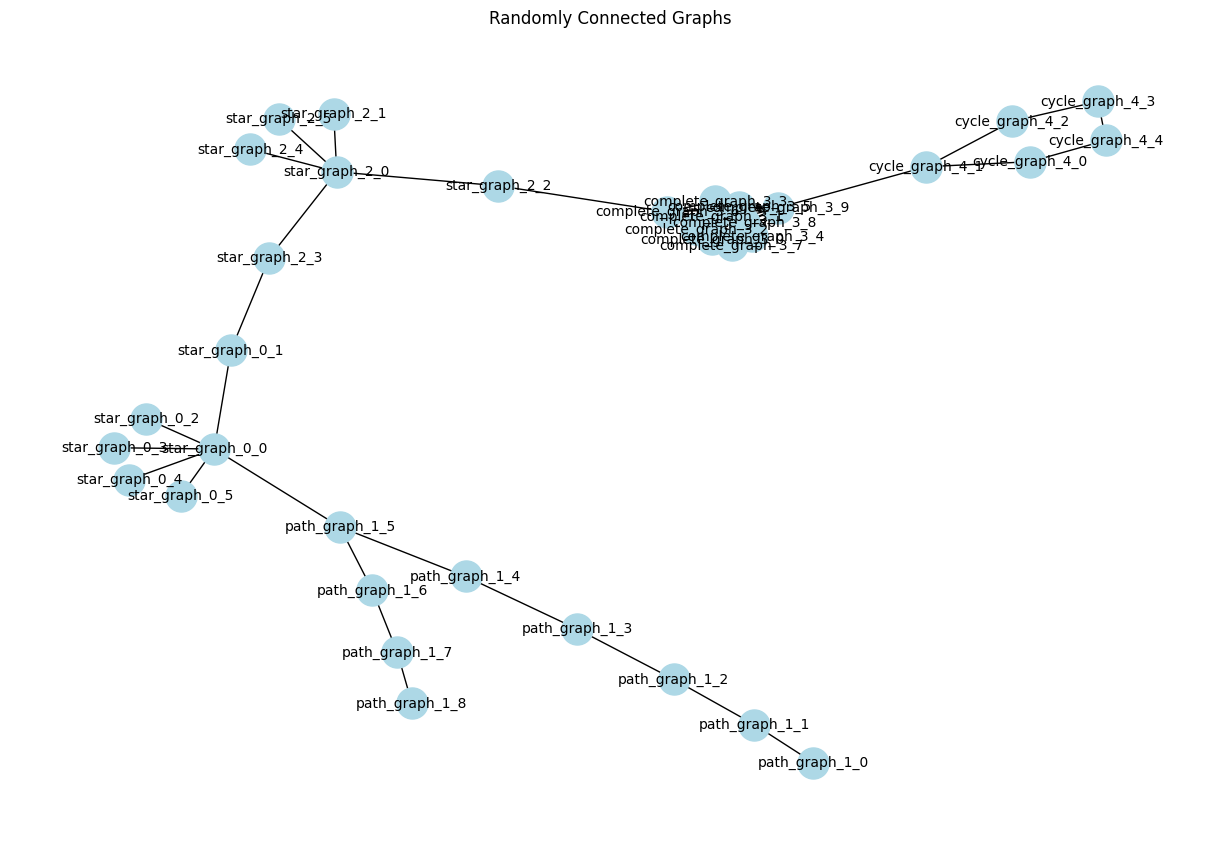

In [6]:
# I think it will be fun to select a few random graphs and connect them together in a big graph
import random
graph_types = [nx.path_graph, nx.cycle_graph, nx.complete_graph, nx.star_graph]
big_graph = nx.Graph()
for i in range(5):
    g_type = random.choice(graph_types)
    if g_type == nx.star_graph:
        n = random.randint(3, 10)
        g = g_type(n)
    else:
        n = random.randint(3, 10)
        g = g_type(n)
    mapping = {node: f"{g_type.__name__}_{i}_{node}" for node in g.nodes()}
    g = nx.relabel_nodes(g, mapping)
    # Connect a random node from the new graph to a random node in the big graph
    if big_graph.number_of_nodes() > 0:
        big_node = random.choice(list(big_graph.nodes()))
        new_node = random.choice(list(g.nodes()))
        big_graph.add_edge(big_node, new_node)
    # Add all nodes and edges from g to big_graph
    big_graph.add_edges_from(g.edges(data=True))

# Time to display the big graph
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(big_graph)
nx.draw(big_graph, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10)
plt.title("Randomly Connected Graphs")
plt.show()

## Question 3

> Explore different layouts (google networkx layouts) for a graph created using the Barabasi Albert graph method with at least 20 vertices.
> - spring_layout
> - circular_layout
> - networkx.nx_pydot.graphviz_layout(G,prog="neato")
> 
> Describe some pros and cons of the different graph layouts. Note that displaying graphs gets very slow for large graphs (e.g., those with a few hundred vertices or more).

In [7]:
# Let's make 3 graphs of increasingly complexity
# One small, one large dense, one large sparse, all have to be made using the Barabasi Albert graph method
small = nx.barabasi_albert_graph(10, 2)
large_dense = nx.barabasi_albert_graph(50, 25)
large_sparse = nx.barabasi_albert_graph(50, 2)

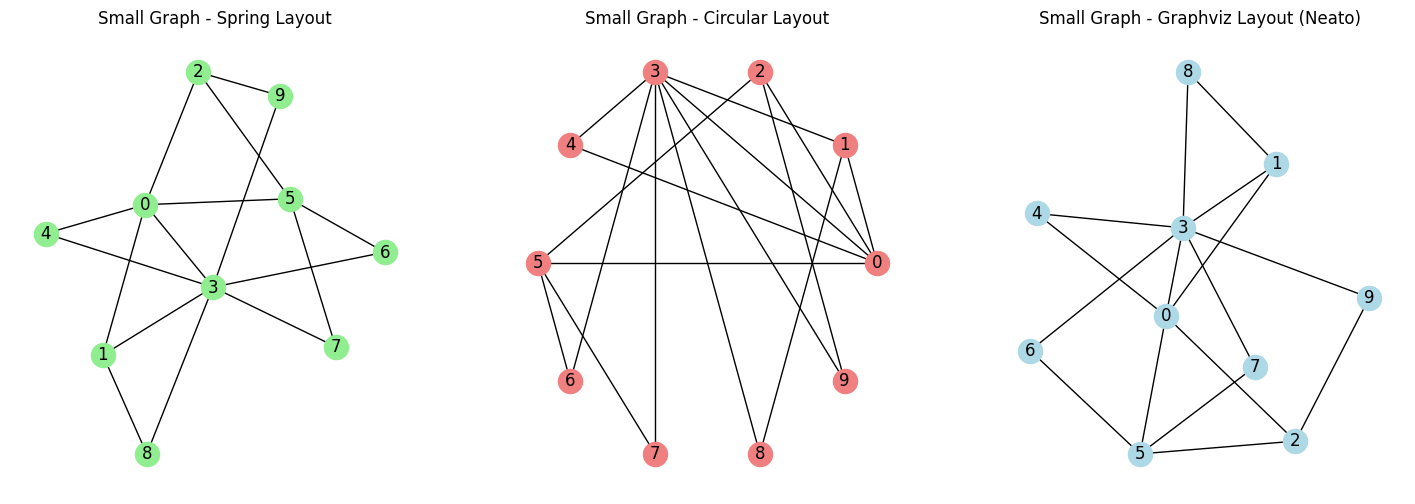

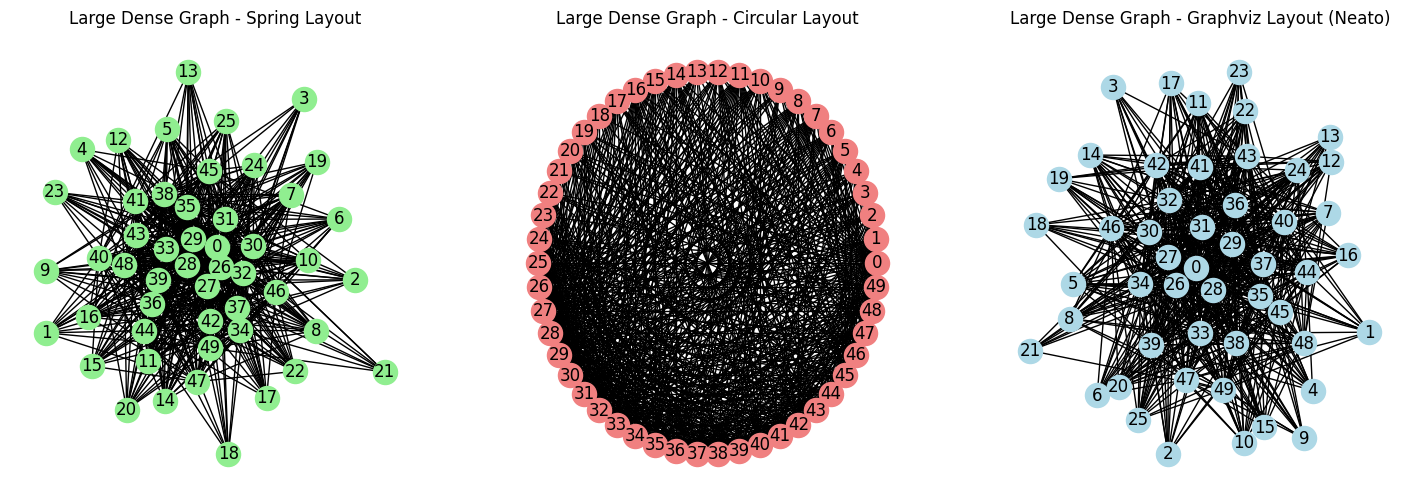

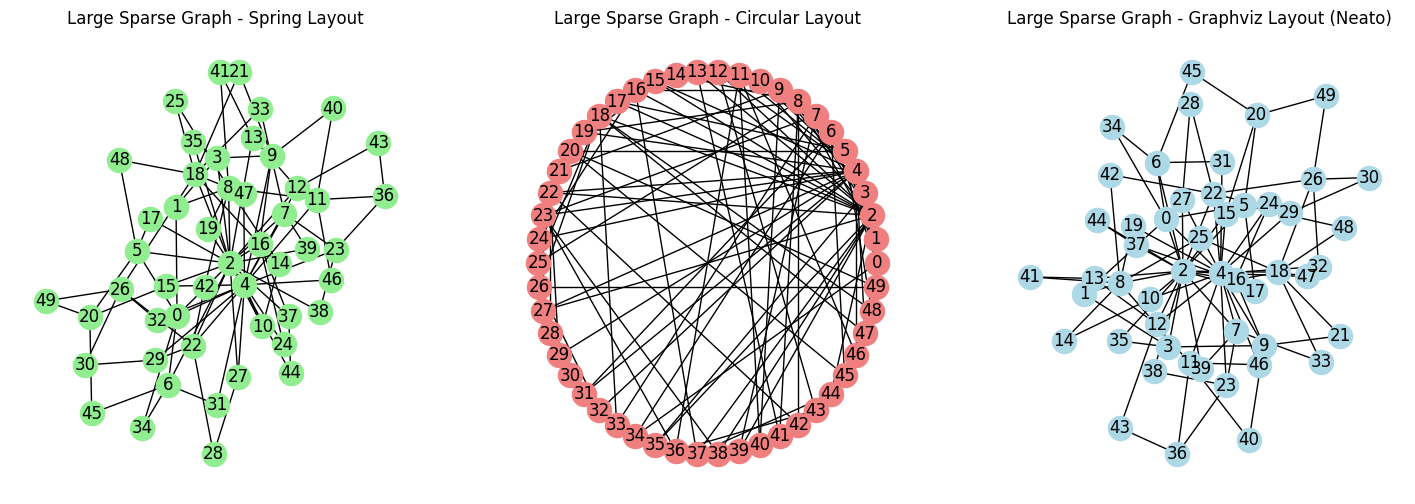

In [8]:
def graph_types(name, graph):
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color="lightgreen")
    plt.title(f"{name} - Spring Layout")
    plt.subplot(1, 3, 2)
    pos = nx.circular_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color="lightcoral")
    plt.title(f"{name} - Circular Layout")
    plt.subplot(1, 3, 3)
    pos = nx.nx_agraph.graphviz_layout(graph, prog="neato")
    nx.draw(graph, pos, with_labels=True, node_color="lightblue")
    plt.title(f"{name} - Graphviz Layout (Neato)")
    plt.show()
graph_types("Small Graph", small)
graph_types("Large Dense Graph", large_dense)
graph_types("Large Sparse Graph", large_sparse)

I made three different graphs, one small, and two large. One of the large ones was sparse and the other dense.

Overall, the small and sparse graphs seemed to do well in any of the methods. The dense graph suffered from having so many edges you couldn't distinguish them. However, you can distinguish the overall shape of the graph spring and neato layout with the dense graph... and that was about it.

For the other two graphs, all of the methods seemed to work decently well, and I imagine which one you would choose would depend on what exactly you were trying to convey. Both the spring and neato method appear to produce rather similar graphs, and I personally prefer neato.

If you wanted to emphasize which node is connected to which node (perhaps 'who is friends with who') or some other information that places emphasis on the actual connections between nodes, I beleive that the circle graph would work best. You can clearly trace which node is connected to which, and it places a sort of "equal importance" on every node so you can focus on the connections instead. Gaps and well connected nodes are easily visible.

In addition, the circle diagram resembles a chord diagram, and I imagine any information that could convievable conveyed on the chord diagram would be well suited to a circular diagram.

As for the spring/neato diagrams, I beleive these are best suited to being used where the actual shape of the graph is what you want to emphasize. If you want to see "outliers" or "well connected nodes" it's well suited for that. Anything where you're looking at how the shape of a graph itself influences something would be well suited to these diagrams. However, due to the nature of these plots, certain nodes will be seen as "more central" or "more important", which may or may not be beneficial.

## Question 4

> Learn how to control the color, size, and labels of individual vertices. Upload an image of a barbell graph where each vertex has its own color and size.

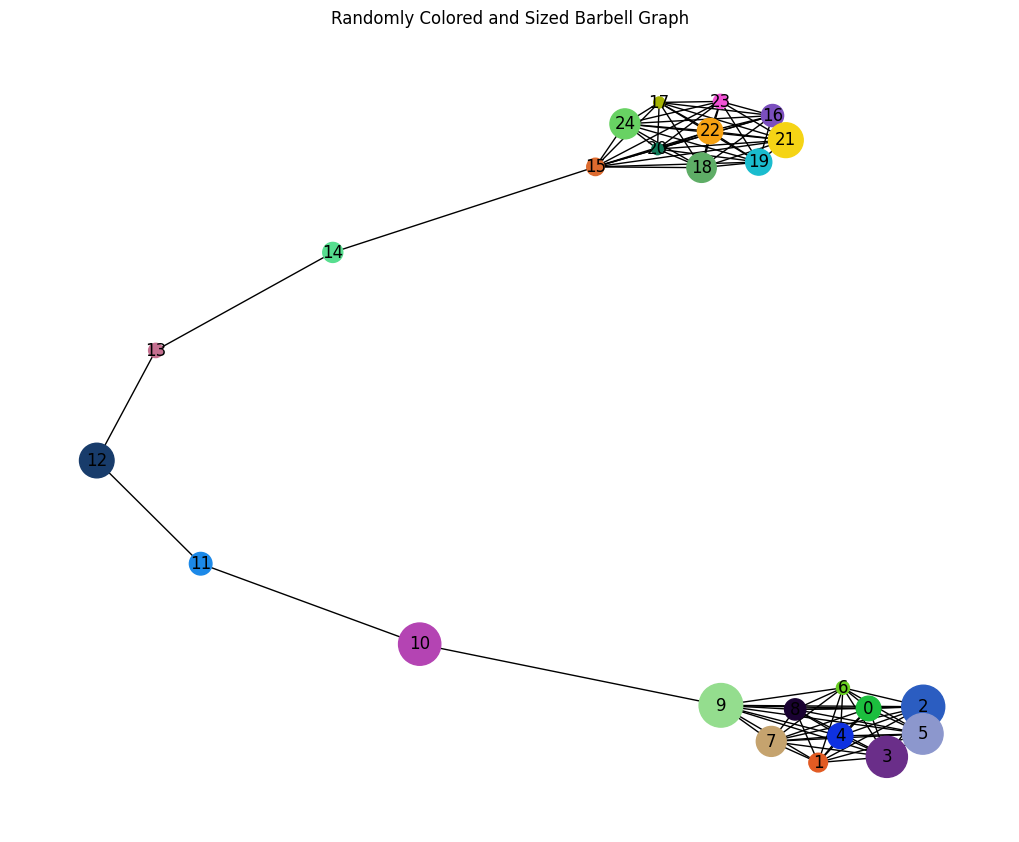

In [13]:
# Let's create a random barbell graph
barbell = nx.barbell_graph(10, 5)
# Let's randomize the color and size of each vertex
import numpy as np
# Make colors RGB
colors = np.random.rand(barbell.number_of_nodes(), 3)
sizes = 1000 * np.random.rand(barbell.number_of_nodes())
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(barbell)
nx.draw(barbell, pos, with_labels=True, node_color=colors, node_size=sizes)
plt.title("Randomly Colored and Sized Barbell Graph")
plt.show()
